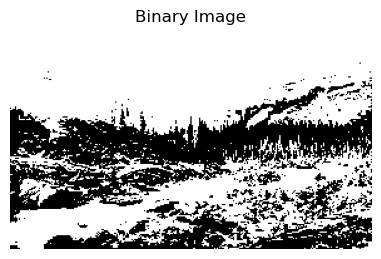

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Image path
image_path = r"C:\Users\Student\Desktop\images\download (2).jpg"

# Function to plot an image
def plotimage(img, title=None, figsize=None):
    h, w = img.shape[:2]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

# Load image and convert to grayscale
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
threshold = 100
gray[gray < threshold] = 0
gray[gray >= threshold] = 1
bw = gray

# Plot the binary image
plotimage(bw, 'Binary Image')

# Hough Transform parameters
min_m = -50
max_m = -min_m
step_m = 0.1
max_b = 2 * max(gray.shape)
min_b = -max_b
step_b = 1
m_vals = np.arange(min_m, max_m, step_m)
b_vals = np.arange(min_b, max_b, step_b)

def draw_line(x, y):
    """
    Returns a new image where the line b=-x*m+y is drawn on it
    """
    res_im = np.zeros(shape=(len(m_vals), len(b_vals)), dtype='int')
    m0 = m_vals[0]
    m1 = m_vals[-1]
    b0 = -x * m0 + y
    b1 = -x * m1 + y
    b0 = int((b0 - min_b) / step_b)
    b1 = int((b1 - min_b) / step_b)
    m0 = int((m0 - min_m) / step_m)
    m1 = int((m1 - min_m) / step_m)
    cv2.line(res_im, (b0, m0), (b1, m1), 1, 1)
    return res_im

# Perform Hough Transform using the custom method
votes = np.zeros(shape=(len(m_vals), len(b_vals)), dtype='int')
for x in range(bw.shape[0]):
    for y in range(bw.shape[1]):
        if bw[x, y]:
            mask = draw_line(x, y)
            votes = votes + mask

plotimage(votes, "Votes from Hough Transform")

def draw_max(image, votes, color=(255, 0, 0), skip=False):
    m0, b0 = np.unravel_index(votes.argmax(), votes.shape)
    votes[m0, b0] = 0
    if skip:
        return
    b = b0 * step_b + min_b
    m = m0 * step_m + min_m
    x0 = 0
    x1 = bw.shape[0]
    y0 = int(m * x0 + b)
    y1 = int(m * x1 + b)
    cv2.line(image, (y0, x0), (y1, x1), color, 1)

# Draw first N Hough lines
image_copy = votes.copy()
im = img.copy()
N = 50
for i in range(N):
    draw_max(im, image_copy, (255, 0, 0), False)

plt.figure()
plt.imshow(im)
plt.title("First N Hough Lines")
plt.show()

# Hough Transform using OpenCV's built-in function
im = img.copy()
lines = cv2.HoughLines(bw, 1, np.pi / 360, 50)
if lines is not None:
    for i in range(min(50, len(lines))):
        for rho, theta in lines[i]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * a)
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * a)
            cv2.line(im, (x1, y1), (x2, y2), (0, 0, 255), 1)

plt.figure()
plt.imshow(im)
plt.title("Hough Lines using OpenCV")
plt.show()
